In [309]:
import os
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from functools import reduce

In [310]:
#First, the dataset is read and a sub dataset of desired values is created to visualize cancer type vs. cancer costs
#Datasset was pulled from the 2020 Medical Care Costs Associated with Cancer Survivorship in the United States article, published in the journal Cancer Epidemiology, Biomarkers & Prevention
cancer_costs = pd.read_csv('cancer_costs.csv')
initial_cost = cancer_costs[["Cancer Site", "Initial care per patient (medical services)"]]
initial_cost = initial_cost.set_index('Cancer Site')
initial_cost.head()

,Initial care per patient (medical services)
Cancer Site,
Bladder,26442.8
Brain,139813.8
Breast,34979.5
Cervix Uteri,58715.6
Colorectal,66523.5


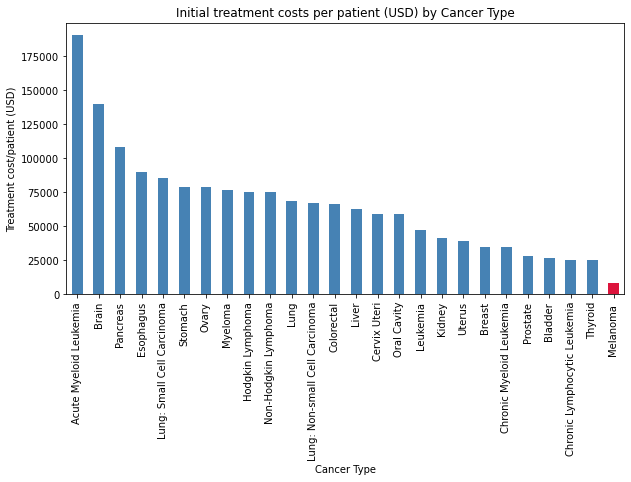

In [311]:
#A bar graph was selected to help visualize the various cancer types and the values are displayed via descending order so that an individual can easily recognize where the cancer of interest, melanoma, falls within the cost spectrum of cancers
initial_cost_sorted = initial_cost.sort_values('Initial care per patient (medical services)', ascending = False)
initial_cost_sorted['Initial care per patient (medical services)'].plot(kind="bar", title = "Initial treatment costs per patient (USD) by Cancer Type", color=['steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue', 'crimson'])
plt.xlabel("Cancer Type")
plt.ylabel("Treatment cost/patient (USD)")
plt.xticks(rotation=90, horizontalalignment="center")
plt.rcParams['figure.figsize'] = [30, 15]

In [312]:
#As shown in the bar graph, melanoma cancer costs are by far the lowest amongst prevelant cancer types, only costing about $8536.70 per patient to receive initial treatment. This contrasts greatly with the most expensive cancer type, acute myeloma, which costs $190305.00 to treat per patient.

In [313]:
#Although this is a relatively less inexpensive cancer type compared to others, how do inicidence and mortality statistics differ between different races, and is there an underlying cause?

In [314]:
#Data pulled from the 2020 CDC Wonder Cancer Database. Data exhibits several repeats of race type due to multiple other criteria such as age ranges, sex, etc. so data has been cleaned to show only the total sum of melanoma incidences for each race population.
melanoma_incidence = pd.read_csv('cancer_incidence.csv')
race_incidence = melanoma_incidence[["Race", "Count"]]
race_incidence = race_incidence.set_index('Race')
race_incidence = race_incidence.groupby(['Race']).sum()
race_incidence.head()

,Count
Race,
American Indian or Alaska Native,3250.0
Asian or Pacific Islander,4113.0
Black or African American,7021.0
Hispanic,28277.0
White,1299040.0


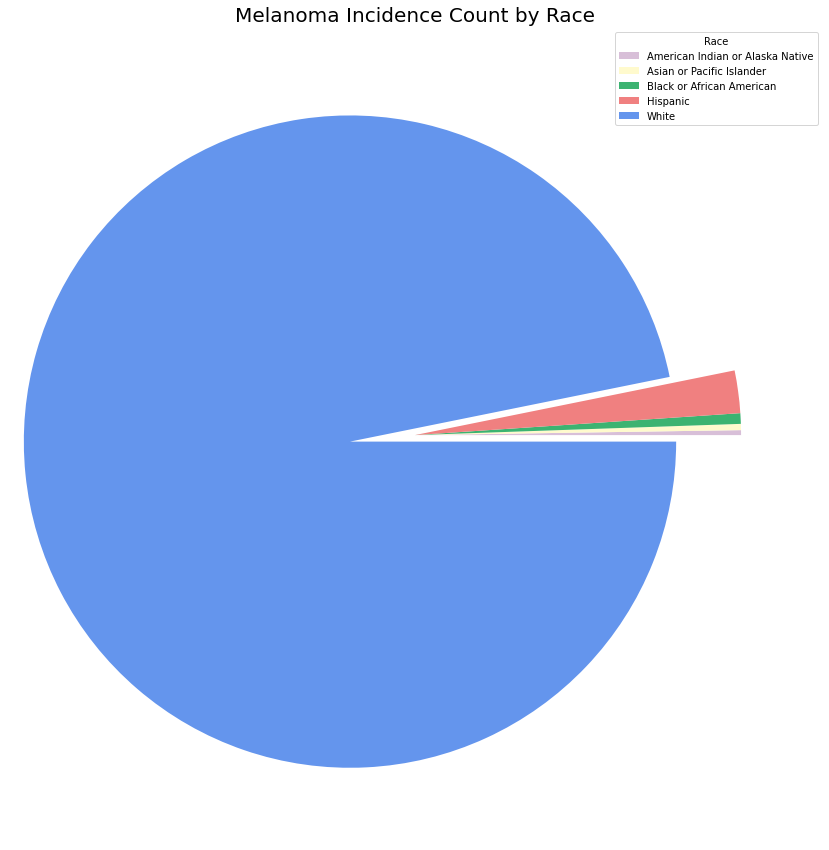

In [315]:
race_iCount = race_incidence["Count"]
mylabels = ["American Indian or Alaska Native", "Asian or Pacific Islander", "Black or African American", "Hispanic", "White"]
mycolors = ["thistle", "lemonchiffon", "mediumseagreen", "lightcoral", "cornflowerblue"]
myexplode = [0, 0, 0, 0, 0.2]
plt.pie(race_iCount, labels = mylabels, labeldistance=None, explode = myexplode, colors = mycolors)
plt.legend(title = "Race")
plt.title("Melanoma Incidence Count by Race", fontsize="20")
plt.show()

In [316]:
#White predominantly suffer from melanoma, with hispanics, black/african americans, asian/pacific islanders, and american indian/alaska natives following in incidence count.
#We will now continue on to look at mortality counts in melanoma, and determine the mortality-incidence ratio for melanoma

melanoma_mortality = pd.read_csv('cancer_mortality.csv')
race_mortality = melanoma_mortality[["Race", "Deaths"]]
race_mortality = race_mortality.set_index('Race')
race_mortality = race_mortality.groupby(['Race']).sum()
race_mortality.head()

,Deaths
Race,
American Indian or Alaska Native,287.0
Asian or Pacific Islander,921.0
Black or African American,2554.0
Hispanic,4158.0
White,168014.0


In [317]:
#Merge indcidence and mortality sub tables by race to then produce an incidence-mortality ratio
race_mi = reduce(lambda x,y: pd.merge(x,y, on='Race', how='outer'), [race_incidence, race_mortality])
race_mi['Incidence-mortality ratio'] = race_mi['Deaths'] / race_mi['Count']
race_mi.head()

,Count,Deaths,Incidence-mortality ratio
Race,,,
American Indian or Alaska Native,3250.0,287.0,0.088308
Asian or Pacific Islander,4113.0,921.0,0.223924
Black or African American,7021.0,2554.0,0.363766
Hispanic,28277.0,4158.0,0.147045
White,1299040.0,168014.0,0.129337


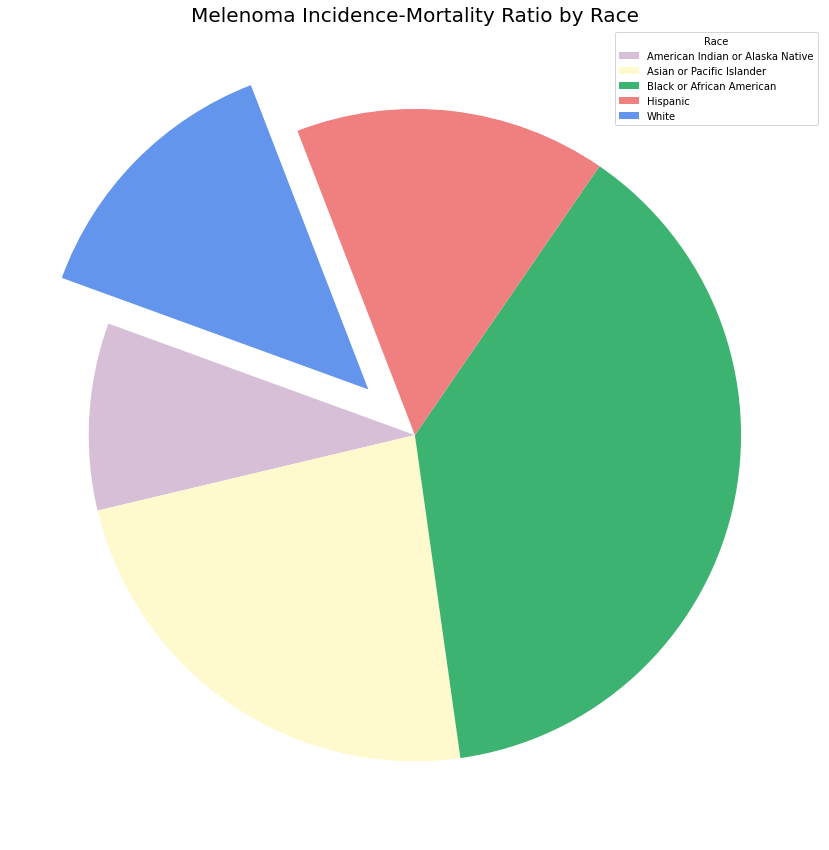

In [318]:
#Pie chart displaying incidence-mortality rates amongst different race populations
race_ratio = race_mi["Incidence-mortality ratio"]
mylabels = ["American Indian or Alaska Native", "Asian or Pacific Islander", "Black or African American", "Hispanic", "White"]
mycolors = ["thistle", "lemonchiffon", "mediumseagreen", "lightcoral", "cornflowerblue"]
myexplode = [0, 0, 0, 0, 0.2]
plt.pie(race_ratio, labels = mylabels, labeldistance=None, explode = myexplode, colors = mycolors, startangle = 160)
plt.legend(title = "Race")
plt.title("Melenoma Incidence-Mortality Ratio by Race", fontsize="20")
plt.show()

In [319]:
#Even though whites were the most heavily effected population in terms of incidence melanoma, whites ado not have the highest incidence mortality rate. Blacks, asians and hispanics hold the highest inicidence-mortality rates amongst the analyzed populations.

In [320]:
#Why is there this disparity in incidence-mortality rates? I thought that it could perhaps be due to differences in SES amongst different races, so I pulled a dataset from the US census bureau looking at annual household income by various household characteristics. For this case, I will focus on the race characteristic by household income.
income_stats = pd.read_csv('race_income.csv')
race_income = income_stats[["Characteristic", "Median Income (dollars)"]]
race_income.head()

,Characteristic,Median Income (dollars)
0,All households,67521.0
1,Family households,86372.0
2,Married-couple,101517.0
3,"Female householder, no spouse present",49214.0
4,"Male householder, no spouse present",67304.0


In [321]:
#Selected data for race only
income = race_income[race_income["Characteristic"].isin(['White', 'Black', 'Asian', 'Hispanic'])]

#Rename rows such that I can combine data with previous dataset on incidence mortality
income_copy = income.copy()
income_copy.rename(columns={'Characteristic': 'Race'}, inplace=True)
income_copy = income_copy.set_index('Race')
income_copy.rename(index={'Black': 'Black or African American'}, inplace=True)
income_copy.rename(index={'Asian': 'Asian or Pacific Islander'}, inplace=True)
income_copy.head()

,Median Income (dollars)
Race,
White,74912.0
Black or African American,45870.0
Asian or Pacific Islander,94903.0
Hispanic,55321.0


In [322]:
#Combine income and incidence mortality rate by race
income_mi = reduce(lambda x,y: pd.merge(x,y, on='Race', how='outer'), [race_mi, income_copy])

income_mi = income_mi[["Incidence-mortality ratio", "Median Income (dollars)"]]
income_mi = income_mi.drop("American Indian or Alaska Native")

income_mi.head()


,Incidence-mortality ratio,Median Income (dollars)
Race,,
Asian or Pacific Islander,0.223924,94903.0
Black or African American,0.363766,45870.0
Hispanic,0.147045,55321.0
White,0.129337,74912.0


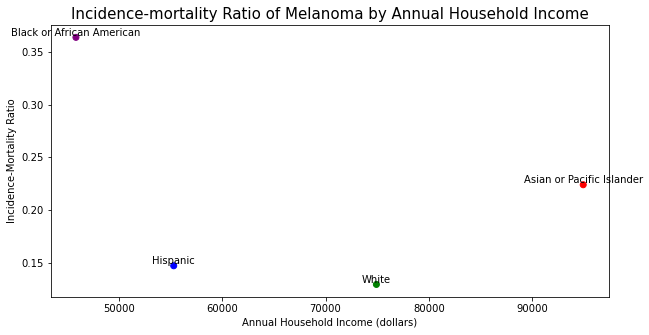

In [326]:
#Create a scatterplot to visualize possible correlation between income and incidence-mortality ratio
income_sorted = income_mi.sort_values('Median Income (dollars)', ascending = False)

colors = np.array(["red","green","blue","purple"])
plt.scatter('Median Income (dollars)', 'Incidence-mortality ratio', data=income_sorted, c=colors);
# plt.rcParams['figure.figsize'] = [10, 5]
plt.title("Incidence-mortality Ratio of Melanoma by Annual Household Income", fontsize="15")
plt.xlabel('Annual Household Income (dollars)')
plt.ylabel('Incidence-Mortality Ratio')

plt.text(94903, 0.223924, 'Asian or Pacific Islander', va='bottom', ha='center')
plt.text(45870, 0.363766, 'Black or African American', va='bottom', ha='center')
plt.text(55321, 0.147045, 'Hispanic', va='bottom', ha='center')
plt.text(74912, 0.129337, 'White', va='bottom', ha='center')

plt.show()

In [327]:
#My initial hypothesis wasn't entirely correct--I hypothesized that there was a inverse correlation between annual household income and the incidence-mortality ratio for melanoma such that as household income decreases, incidence-mortality ratio increases. With the exception of Asians, there is an inverse correlation between the two variables, but further investigation must be conducted to discover why asians, despite their high income household and ability to pay for treatment, have a high incidence-mortality ratio. 
#While it could be true that Blacks and African Americans have the highest incidence-mortality rate of all races due to their low household-income, it cannot be said that just by having a high annual income one will have a low incidence-mortality ratio, as exhibited by the Asian population above. 

In [328]:
#In conclusion, while melanoma treatment costs are relatively low in comparison to other cancers, race groups are disproportionately affected by melanoma, with Whites having the highest incidence counts. However, they have one of the lowest incidence-mortality ratios, suggesting that there is a confounding variable that helps or harms survival chances of various race populations. While social economic status can be a potential factor, it is not a sole or primary driver in mortality/survival rates amongst melanoma patients. 